In [99]:
import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from scipy.stats import anderson, kstest, shapiro

In [100]:
file = "data/sleep_merged.csv"

In [101]:
data = pd.read_csv(file)

In [102]:
df = copy.deepcopy(data)

In [103]:
cols = df.columns

In [104]:
def dataframe_recreate():
    global df
    df = copy.deepcopy(data)
    cols = df.columns

#### Vore column encoding  

In [105]:
df["Vore_class"] = copy.deepcopy(df["Vore"])

df.loc[df["Vore_class"] == "carni","Vore_class"] = 1
df.loc[df["Vore_class"] == "insecti","Vore_class"] = 2
df.loc[df["Vore_class"] == "herbi","Vore_class"] = 3
df.loc[df["Vore_class"] == "omni","Vore_class"] = 4

In [106]:
df = pd.get_dummies(df, columns=["Vore"], prefix=["Vore"], drop_first=True)


In [107]:
df[["Vore_insecti","Vore_herbi","Vore_omni"]] = df[["Vore_insecti","Vore_herbi","Vore_omni"]].astype(int)


In [108]:
df["Vore"] = data["Vore"]

In [109]:
cols = df.columns

In [110]:
df.head()

,Species,Genus,Order,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,Vore_class,Vore_herbi,Vore_insecti,Vore_omni,Vore
0,Cheetah,Acinonyx,Carnivora,lc,50.000,0.0,12.1,11.9,NaN,NaN,20.0,93.0,NaN,NaN,NaN,1,0,0,0,carni
1,Northern fur seal,Callorhinus,Carnivora,vu,20.490,0.0,8.7,15.3,NaN,1.4,26.0,358.0,NaN,NaN,NaN,1,0,0,0,carni
2,Lion,Panthera,Carnivora,vu,161.499,0.0,13.5,10.5,NaN,NaN,20.0,115.0,NaN,NaN,NaN,1,0,0,0,carni
3,Tiger,Panthera,Carnivora,en,162.564,0.0,15.8,8.2,NaN,NaN,23.0,112.0,NaN,NaN,NaN,1,0,0,0,carni
4,Caspian seal,Phoca,Carnivora,vu,86.000,0.0,3.5,20.5,NaN,0.4,35.0,334.0,NaN,NaN,NaN,1,0,0,0,carni


# Visualization

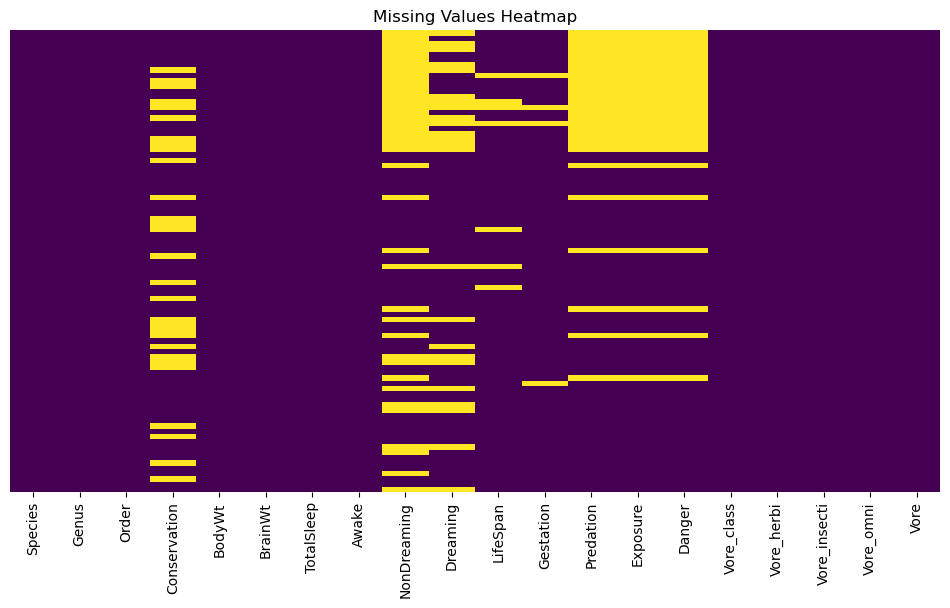

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_18092\39488587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Order',order=df["Order"].value_counts().index, palette="viridis")


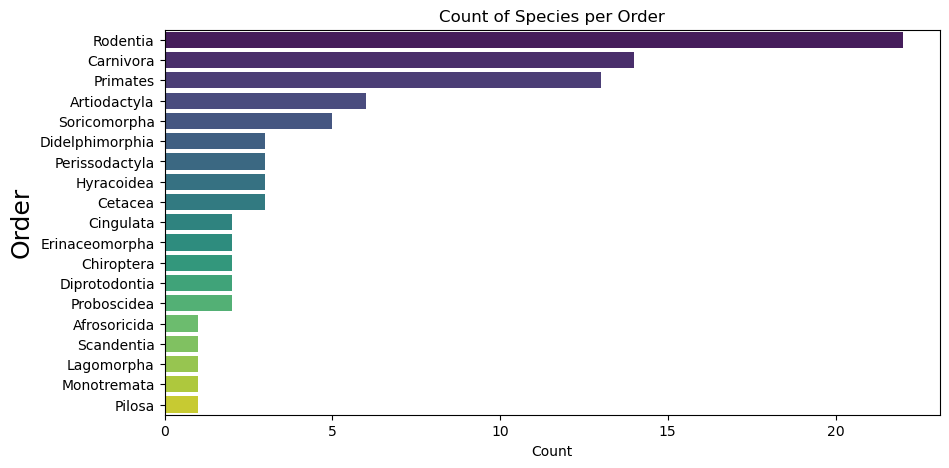

In [112]:
# Count of species per Order
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Order',order=df["Order"].value_counts().index, palette="viridis")
plt.title('Count of Species per Order')
plt.xlabel('Count')
plt.ylabel('Order', fontsize=18)
plt.show()

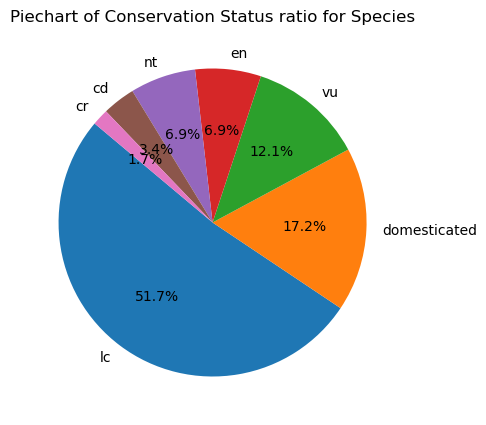

In [113]:
# Conservation status
plt.figure(figsize=(5, 5))
df['Conservation'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Piechart of Conservation Status ratio for Species')
plt.ylabel('')
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_18092\1928179836.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Conservation', y='LifeSpan', linewidth=1, palette="Set2", showfliers=True, order=order)


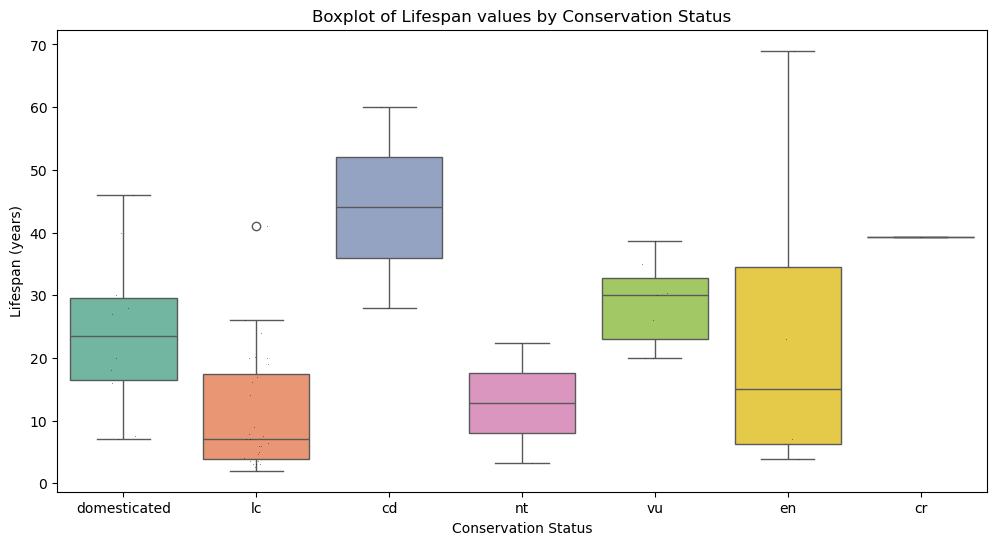

In [114]:
# Boxplot of Lifespan by Conservation status
order = ["domesticated","lc","cd","nt","vu","en","cr"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Conservation', y='LifeSpan', linewidth=1, palette="Set2", showfliers=True, order=order)
sns.stripplot(data= df , y="LifeSpan", x = "Conservation",color="black", size=0.4)

plt.title('Boxplot of Lifespan values by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Lifespan (years)')
plt.show()

In [115]:
df["Conservation_count"] = df.groupby("Conservation")["Conservation"].transform("count")

C:\Users\moham\AppData\Local\Temp\ipykernel_18092\108933765.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Conservation", order=df['Conservation'].value_counts().index, palette="viridis")


<Axes: xlabel='count', ylabel='Conservation'>

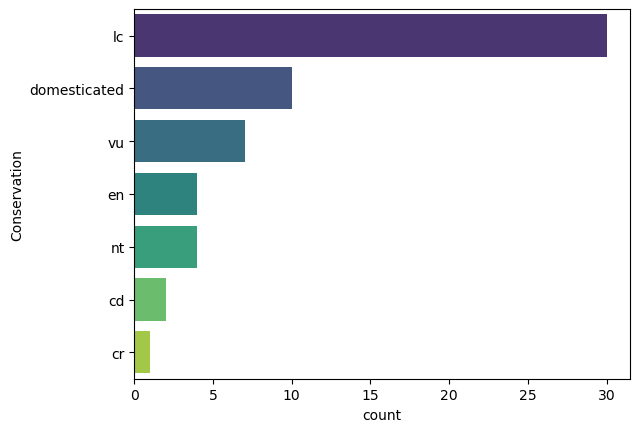

In [116]:
sns.countplot(data=df, y="Conservation", order=df['Conservation'].value_counts().index, palette="viridis")

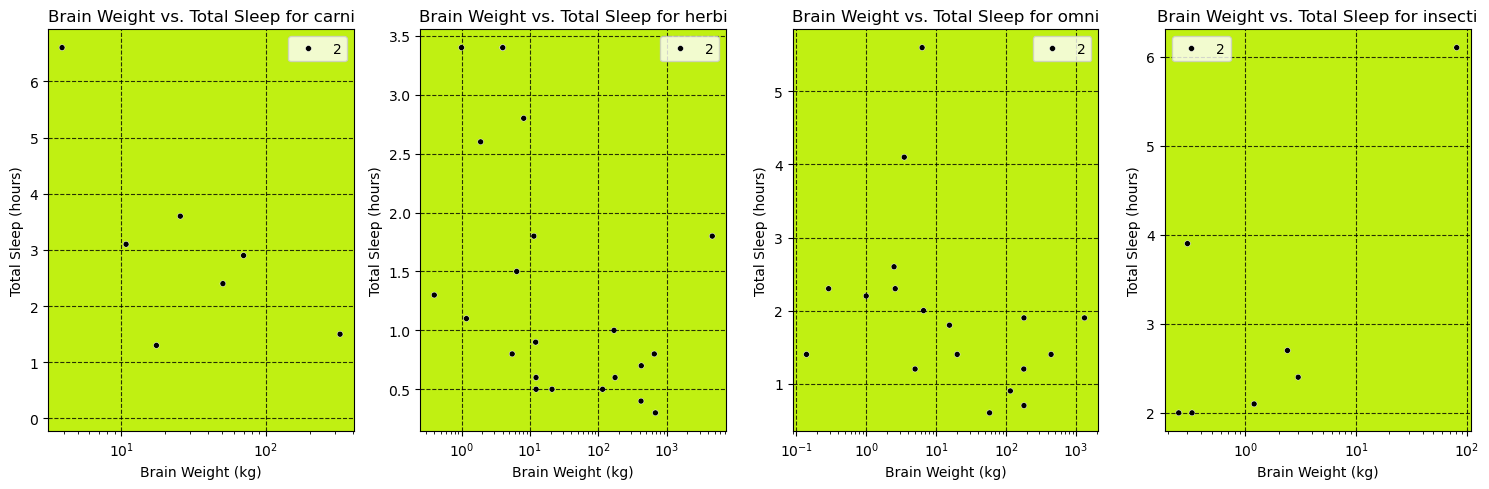

In [117]:
unique_vore = df["Vore"].unique()

# Create subplots
fig, axes = plt.subplots(1, len(unique_vore), figsize=(15, 5))
# Loop through each unique value in "Vore" and create scatter plots
for i, diet in enumerate(unique_vore):
    dff = df[df["Vore"] == diet]
    ax = axes[i]
    sns.scatterplot(data=dff, x='BrainWt', y='Dreaming', ax=ax, marker="o", size=2, color='black')
    ax.set_title(f"Brain Weight vs. Total Sleep for {diet}")
    ax.set_xlabel('Brain Weight (kg)')
    ax.set_ylabel('Total Sleep (hours)')
    ax.set_xscale('log')

    ax.set_facecolor('#C0F012')  # Dark background
    ax.grid(True, linestyle='--', alpha=0.8, color="black")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

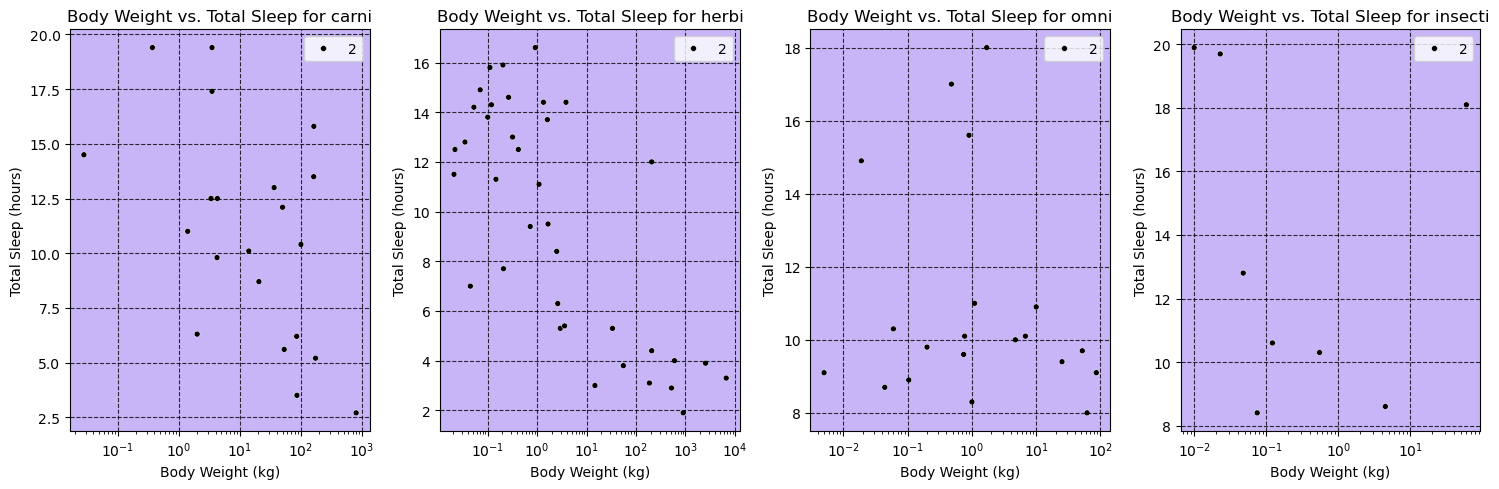

In [118]:
unique_vore = df["Vore"].unique()

# Create subplots
fig, axes = plt.subplots(1, len(unique_vore), figsize=(15, 5))

# Loop through each unique value in "Vore" and create scatter plots
for i, diet in enumerate(unique_vore):
    dff = df[df["Vore"] == diet]
    ax = axes[i]
    sns.scatterplot(data=dff, x='BodyWt', y='TotalSleep', ax=ax, marker="o", size=2, color='black')
    ax.set_title(f"Body Weight vs. Total Sleep for {diet}")
    ax.set_xlabel('Body Weight (kg)')
    ax.set_ylabel('Total Sleep (hours)')
    ax.set_xscale('log')

    ax.set_facecolor('#C7B5F7')  # Dark background
    ax.grid(True, linestyle='--', alpha=0.8, color="black")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

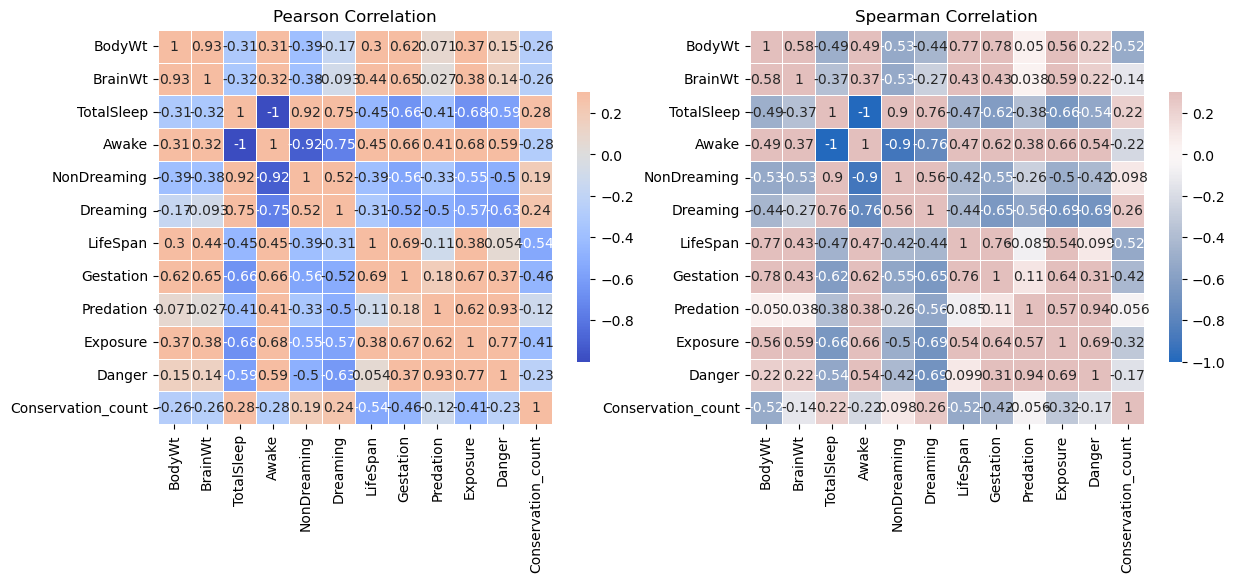

In [119]:
# Filtering only numerical columns for correlation matrix
num_df = df.select_dtypes(include=["float", "int"])
num_df = num_df.drop(["Vore_herbi","Vore_insecti","Vore_omni"], axis=1)

# Create subplots with two columns to display two heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Calculate and draw the Pearson correlation heatmap
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm',
            vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axes[0])
axes[0].set_title("Pearson Correlation")

# Calculate and draw the Spearman correlation heatmap
sns.heatmap(num_df.corr(method='spearman'), annot=True, cmap='vlag',
            vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axes[1])
axes[1].set_title("Spearman Correlation")

# Display the plot
plt.show()


##### Here we will investigate the distribution of each feature 

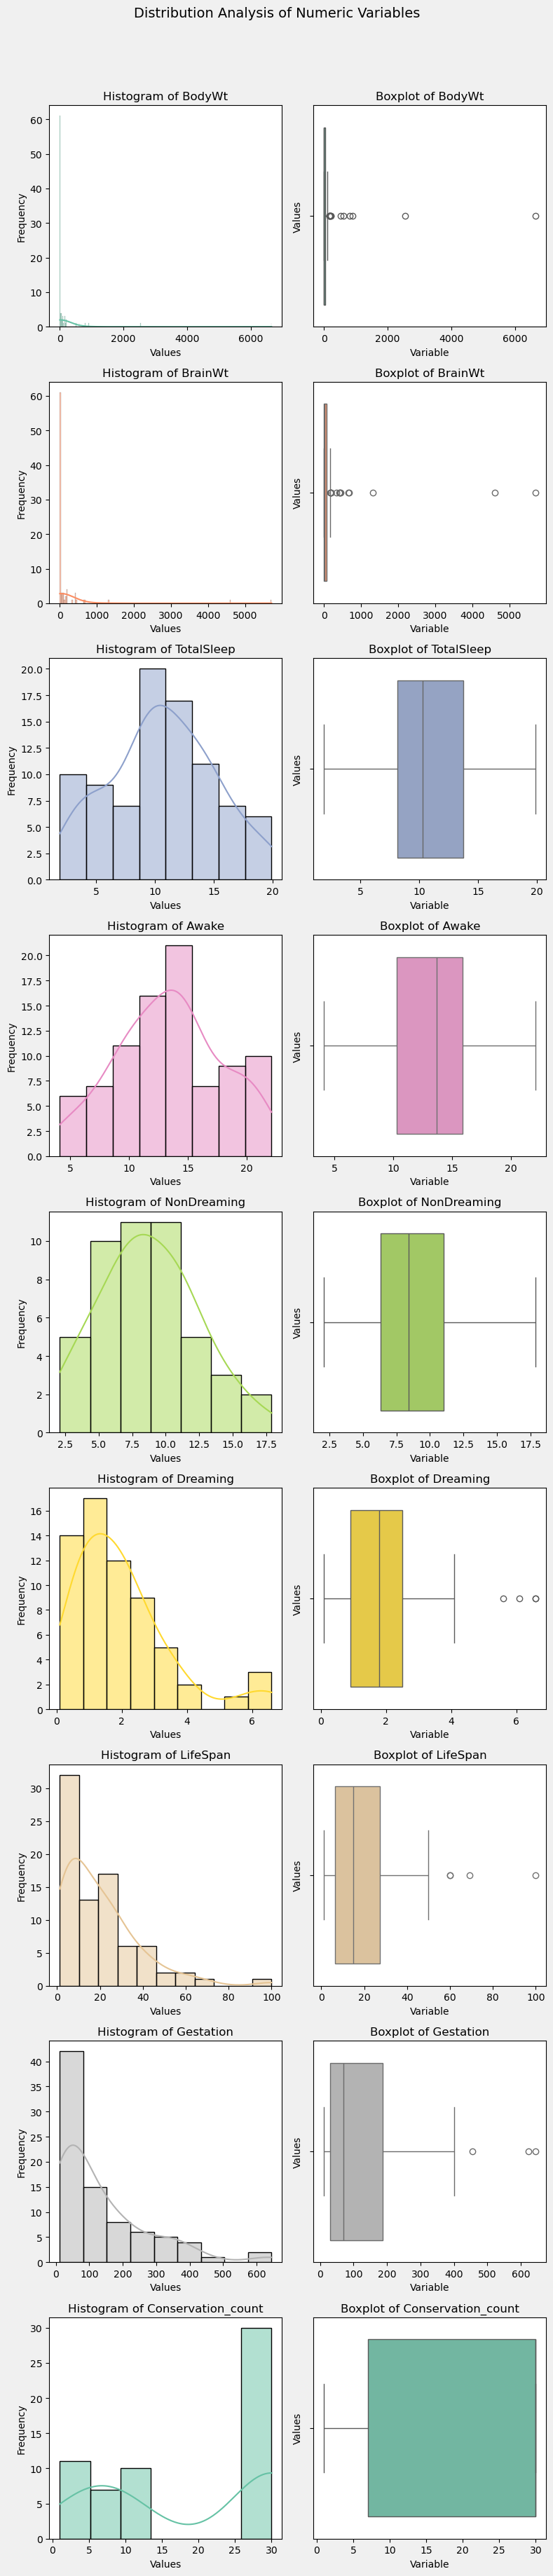

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to plot
numeric_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"] and col not in ['Predation', 'Exposure', 'Danger']]

# Define a color palette for the plots
color_palette = sns.color_palette("Set2", len(numeric_cols))

# Create a figure for the subplots with a smaller size and non-white background
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(8, 4 * len(numeric_cols)))  # Adjust figsize
fig.set_facecolor('#f0f0f0')  # Set background color to light gray

for i, col in enumerate(numeric_cols):
    # Plot the histogram on the left (first column)
    sns.histplot(data=df, x=col, bins="auto", kde=True, ax=axes[i, 0], color=color_palette[i])
    axes[i, 0].set_title(f"Histogram of {col}")
    axes[i, 0].set_xlabel("Values")
    axes[i, 0].set_ylabel("Frequency")
    
    # Plot the boxplot on the right (second column)
    sns.boxplot(data=df, x=col, ax=axes[i, 1], color=color_palette[i])
    axes[i, 1].set_title(f"Boxplot of {col}")
    axes[i, 1].set_xlabel("Variable")
    axes[i, 1].set_ylabel("Values")

# Add a title to the entire figure
plt.suptitle("Distribution Analysis of Numeric Variables", fontsize=14, y=1.02)  # Adjust fontsize

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

##### I create some useful functions to check for correlations and normality, that we will often need throughout this notebook 

In [121]:
#I define a correlation function that returns the corr a target column has with other columns if corr > t (threshold)
#I use both pearson and spearman because some features are not normally distributed etc.

def corr_func(target: str, t):
    spear_corr = {}
    pears_corr = {}
    for col in cols:
        if df[col].dtype in ["float64", "int64"] and col != target:
            # Pairwise deletion to include only rows where there is no missing values at all in either of the two features
            valid_rows = df[[col, target]].dropna()

            if len(valid_rows) > 0:  # Check if there are valid rows for correlation (since I know the dataset, it's useless here but i still include it)
                correlation, p_value = spearmanr(valid_rows[col], valid_rows[target])
                correlation2 = valid_rows[col].corr(valid_rows[target])
                if abs(correlation) >= t:
                    spear_corr[col] = round(correlation, 2)
                elif abs(correlation2) >= t:
                    pears_corr[col] = round(correlation2, 2)
    print(f"Correlation for {target} : \n\n Spearman correlation is: {spear_corr}", "\n\n", f"Pearson correlation is: {pears_corr}")

    return


##### Here next we will define a function to test not graphically but analyticaly the normality of our features

In [122]:
from scipy.stats import kstest, anderson, norm

def normal_test(feature, alpha):
    result = {}

    # Kstest
    ks_stat, ks_pvalue = kstest(feature, 'norm')
    ks_normal = ks_pvalue > alpha
    result['Kolmogorov-Smirnov'] = {'Statistic': ks_stat, 'p_value': ks_pvalue, 'Normal': ks_normal}

    ''''#Anderson
    ad_statistic, ad_critical_values, ad_significance_level = anderson(feature, dist="norm")
    ad_normal = ad_statistic < ad_critical_values[ad_significance_level == alpha][0]'''
    ##ANDERSON TEST seems to fail unexpectedly, I try to make it work, and to not block the code if it fails


    # Check if the sample size is sufficient for Anderson-Darling
    if len(feature) >= 3:
        try:
            ad_statistic, ad_critical_values, ad_significance_level = anderson(feature, dist="norm")
            ad_normal = ad_statistic < ad_critical_values[ad_significance_level == alpha][0]
            result['Anderson-Darling'] = {'Statistic': ad_statistic, 'Critical Values': ad_critical_values, 'Significance Level': ad_significance_level, 'Normal': ad_normal}
        except (ValueError, IndexError):
            result['Anderson-Darling'] = {'Statistic': None, 'Critical Values': None, 'Significance Level': None, 'Normal': False}
            result['Error'] = 'Anderson-Darling test failed'
    else:
        result['Error'] = 'Insufficient data points for testing'


    return result

##### To assess whether a feature is normal or not, we can run some statistical test, extract their p-value and compare it to the p value cutoff. (we can set it 0.05, higher or lower).

In [123]:
label = df["TotalSleep"].dropna().astype(float)
result = normal_test(label, alpha=0.05)
print(result)

{'Kolmogorov-Smirnov': {'Statistic': 0.9850387733233962, 'p_value': 3.335620642889021e-159, 'Normal': False}, 'Anderson-Darling': {'Statistic': None, 'Critical Values': None, 'Significance Level': None, 'Normal': False}, 'Error': 'Anderson-Darling test failed'}


## Data cleaning

#### We now will fill out the missing values for Predation, Exposure, Danger

In [124]:
df["Predation"] = df["Predation"].fillna(df.groupby("Order")["Predation"].transform("mean").round())
df["Exposure"] = df["Exposure"].fillna(df.groupby("Order")["Exposure"].transform("mean").round())
df["Danger"] = df["Danger"].fillna(df.groupby("Order")["Danger"].transform("mean").round())

##### It seems grouping by vore, gives some clues on the these features as well, so we can see that there is a low std dev of pred, exp, dang, grouped by vore
Notes: Actually grouping by vore was doable at first, but it's a choice. Order and Vore are very much linked, they got the same vore for the same order (almost), sometimes herbi/omni but herbi/omni have almost the same mean. So it's fine and on parallel grouping by order can contain real information other than vore for predation exposure

In [125]:
df["Predation"] = df["Predation"].fillna(df.groupby("Vore")["Predation"].transform("mean").round())
df["Exposure"] = df["Exposure"].fillna(df.groupby("Vore")["Exposure"].transform("mean").round())
df["Danger"] = df["Danger"].fillna(df.groupby("Vore")["Danger"].transform("mean").round())

#### Here we will correct the 0 values found in the BrainWt feature that should not be 0

In [126]:
df["BrainWt"] = df["BrainWt"].replace(0, np.nan)

In [127]:
df_model = df[["BodyWt","BrainWt"]].dropna()

In [128]:
spearman_corr, p_value = spearmanr(df_model["BodyWt"],df_model["BrainWt"])
print(spearman_corr)
print(p_value)

0.95426707170921
3.245340518275321e-34


##### We train a linear regression model to fill out the 0 values fo brain weight based on body weight

In [129]:
feature = df_model["BodyWt"].values.reshape(-1,1)
target = df_model["BrainWt"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.1, random_state = 11)

In [130]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [131]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

7410.142884760871 0.3269973287388068


##### We do the regression imputation

In [132]:
df_model_null = df[df["BrainWt"].isnull()]
df_model_complete = df[-df["BrainWt"].isnull()]

model = LinearRegression()

# Train the model using the complete data
X = df_model_complete["BodyWt"].values.reshape(-1, 1)
y = df_model_complete["BrainWt"].values
model.fit(X, y)

# Use the trained model to predict "BrainWt" for the missing values
X_predict = df_model_null["BodyWt"].values.reshape(-1, 1)
y_pred = model.predict(X_predict)
y_pred = np.maximum(y_pred, 0)

#rounding
y_pred = np.round(y_pred,2)
# Replace the missing "BrainWt" values with the predicted values
df.loc[df["BrainWt"].isnull(), "BrainWt"] = y_pred

#### Dealing with remaining NA in Gestation using brainwt, bodywt, totalsleep

##### We going to fill some LifeSpan rows where gestation is available using regression imputation again

In [133]:
corr_func("LifeSpan",0)

Correlation for LifeSpan : 

 Spearman correlation is: {'BodyWt': 0.77, 'BrainWt': 0.76, 'TotalSleep': -0.47, 'Awake': 0.47, 'NonDreaming': -0.42, 'Dreaming': -0.44, 'Gestation': 0.76, 'Predation': -0.26, 'Exposure': 0.5, 'Danger': -0.09} 

 Pearson correlation is: {}


In [134]:
# We going to fill some LifeSpan rows where gestation is available
df_model = df.dropna()
df_model_features = df_model[["BrainWt", "TotalSleep","Gestation"]]
df_model_target = df_model[["LifeSpan"]]

X_train, X_test, y_train, y_test = train_test_split(df_model_features, df_model_target, test_size = 0.1, random_state = 11)
y_train = y_train.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)

df_model_features_test = df[df["LifeSpan"].isnull() & -df["Gestation"].isnull()]
X_test = df_model_features_test[["BrainWt","TotalSleep","Gestation"]]

y_pred = model.predict(X_test)
df.loc[df["LifeSpan"].isnull() & -df["Gestation"].isnull(), "LifeSpan"] = y_pred
df["LifeSpan"] = np.round(df["LifeSpan"],1)

#### We going to FULLY fill out Gestation missing values through regression imputation

In [135]:
corr_func("Gestation",0.5)

Correlation for Gestation : 

 Spearman correlation is: {'BodyWt': 0.78, 'BrainWt': 0.74, 'TotalSleep': -0.62, 'Awake': 0.62, 'NonDreaming': -0.55, 'Dreaming': -0.65, 'LifeSpan': 0.76, 'Exposure': 0.57} 

 Pearson correlation is: {}


In [136]:
# We going to FULLY fill out Gestation missing values through regression imputation
df_model = df.dropna()
df_model_features = df_model[["BodyWt","BrainWt", "TotalSleep"]]
df_model_target = df_model[["Gestation"]]

X_train, X_test, y_train, y_test = train_test_split(df_model_features, df_model_target, test_size = 0.1, random_state = 11)
y_train = y_train.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)

df_model_features_test = df[df["Gestation"].isnull()]
X_test = df_model_features_test[["BodyWt","BrainWt", "TotalSleep"]]

y_pred = model.predict(X_test)
gestation_minimum = df["Gestation"].min()
y_pred = np.round(np.maximum(y_pred, gestation_minimum),1)
df.loc[df["Gestation"].isnull(), "Gestation"] = y_pred
df["Gestation"] = np.round(df["Gestation"],1)

#### We going to fill the remaining LifeSpan rows now that all gestation is available

In [137]:
# We going to fill the remaining LifeSpan rows now that all gestation is available
df_model = df.dropna()
df_model_features = df_model[["BrainWt", "TotalSleep","Gestation"]]
df_model_target = df_model[["LifeSpan"]]

X_train, X_test, y_train, y_test = train_test_split(df_model_features, df_model_target, test_size = 0.1, random_state = 11)
y_train = y_train.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)

df_model_features_test = df[df["LifeSpan"].isnull() & -df["Gestation"].isnull()]
X_test = df_model_features_test[["BrainWt","TotalSleep","Gestation"]]

y_pred = model.predict(X_test)
df.loc[df["LifeSpan"].isnull() & -df["Gestation"].isnull(), "LifeSpan"] = y_pred
df["LifeSpan"] = np.round(df["LifeSpan"],1)

#### Now we will clean Dreaming and NonDreaming

##### We begin with Dreaming, it has the least amount of missing values of the two

In [138]:
# we quickly test what Dreming correlates with

corr_func("Dreaming", 0.5)

Correlation for Dreaming : 

 Spearman correlation is: {'TotalSleep': 0.76, 'Awake': -0.76, 'NonDreaming': 0.56, 'Gestation': -0.69, 'Exposure': -0.63, 'Danger': -0.53} 

 Pearson correlation is: {}


##### Correlation for Dreaming : 
 ##### Spearman correlation is: {'TotalSleep': 0.76, 'Awake': -0.76, 'NonDreaming': 0.56, 'Gestation': -0.69, 'Exposure': -0.63, 'Danger': -0.53} 
 ##### So we will consider TotalSleep, Gestation and Danger

In [139]:
corr_func("Dreaming", 0.5)

Correlation for Dreaming : 

 Spearman correlation is: {'TotalSleep': 0.76, 'Awake': -0.76, 'NonDreaming': 0.56, 'Gestation': -0.69, 'Exposure': -0.63, 'Danger': -0.53} 

 Pearson correlation is: {}


In [140]:
df.isna().sum()

Species                0
Genus                  0
Order                  0
Conservation          29
BodyWt                 0
BrainWt                0
TotalSleep             0
Awake                  0
NonDreaming           40
Dreaming              24
LifeSpan               0
Gestation              0
Predation              0
Exposure               0
Danger                 0
Vore_class             0
Vore_herbi             0
Vore_insecti           0
Vore_omni              0
Vore                   0
Conservation_count    29
dtype: int64

In [141]:
df_model = df[-df["Dreaming"].isnull()]
df_model_null_dreaming = df[df["Dreaming"].isnull()]


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features and target
features = df_model[["TotalSleep","Exposure"]]
target = df_model[["Dreaming"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mse =", mse, "r2 =", r2)


mse = 0.4954809065909126 r2 = 0.7196643012592425


In [142]:
# trying to find the heaviest predictor from the features above

# Assuming you have already trained your linear regression model as shown in your code
# model = LinearRegression()
# model.fit(X_train, y_train)

# Access the coefficients (weights) of the features
coefficients = model.coef_

# Create a dictionary to associate feature names with their coefficients
feature_coefficients = dict(zip(features.columns, coefficients[0]))

# Find the heaviest predictor (feature with the largest absolute coefficient)
heaviest_predictor = max(feature_coefficients, key=lambda k: abs(feature_coefficients[k]))

# Print the coefficients of all features and the heaviest predictor
print("Feature Coefficients:")
for feature, coefficient in feature_coefficients.items():
    print(f"{feature}: {coefficient:.4f}")

print("\nThe Heaviest Predictor is:", heaviest_predictor)


Feature Coefficients:
TotalSleep: 0.2095
Exposure: -0.1072

The Heaviest Predictor is: TotalSleep


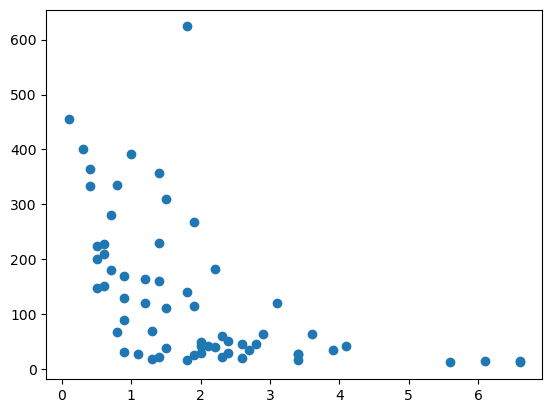

In [143]:
plt.scatter(df["Dreaming"], df["Gestation"])

In [144]:
corr_func("Dreaming",0.5)
kendal_corr = df["Dreaming"].corr(df["Gestation"], method="kendall")
print("\n\n Kendall correlation coefficient is ", kendal_corr)

Correlation for Dreaming : 

 Spearman correlation is: {'TotalSleep': 0.76, 'Awake': -0.76, 'NonDreaming': 0.56, 'Gestation': -0.69, 'Exposure': -0.63, 'Danger': -0.53} 

 Pearson correlation is: {}


 Kendall correlation coefficient is  -0.5033927081768647


##### I don't understand why but the model doesn't put any weight on Gestation despite the good negative correlation between both ? So we remove gestation in the model since it has no influence. We can dig further to understand it maybe comparing with xlstat , minitab or other...

##### We tested a bunch of models and features to assess which is preferable for imputing values in Dreaming. It seems Linear regression offers the best score as far as the test was conducted. We trained it previoudly, now we use it to do the imputation.

In [145]:
df_dreaming_null = df[df['Dreaming'].isnull()]

X_test = df_dreaming_null[["TotalSleep","Exposure"]]


# Make predictions on the test set
y_imputation = model.predict(X_test)


df.loc[df["Dreaming"].isnull(),"Dreaming"] = y_imputation


In [146]:
df["Dreaming"].isna().sum()

0

##### Dreaming now has no missing values, imputation done

#### NonDreaming cleaning

In [147]:
corr_func("NonDreaming",0.000001)

Correlation for NonDreaming : 

 Spearman correlation is: {'BodyWt': -0.53, 'BrainWt': -0.53, 'TotalSleep': 0.9, 'Awake': -0.9, 'Dreaming': 0.55, 'LifeSpan': -0.4, 'Gestation': -0.56, 'Predation': -0.26, 'Exposure': -0.5, 'Danger': -0.42} 

 Pearson correlation is: {}


In [148]:
df_ndreaming_null = df[df["NonDreaming"].isnull()]
df_ndreaming_complete = df[-df["NonDreaming"].isnull()]

feature = df_ndreaming_complete[["TotalSleep","BrainWt","BodyWt","Dreaming","Gestation"]]
target = df_ndreaming_complete[["NonDreaming"]]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=3)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mse =", mse, "r2 =", r2)



mse = 0.3742039997939509 r2 = 0.9659470920843806


##### We get a very high R2 = 0.96 for seed n =3 which is good, it must be checked nevertheless (especially overfitting case since we used quite a lot regression imputation)

In [149]:
# Now we will to the regression imputation

x = df_ndreaming_null[["TotalSleep","BrainWt","BodyWt","Dreaming","Gestation"]]

y_imputation = model.predict(x)

df.loc[df["NonDreaming"].isnull(),"NonDreaming"] = y_imputation

In [150]:
df["NonDreaming"].isna().sum()

0

In [151]:
df["Dreaming"] = df["Dreaming"].round(2)
df["NonDreaming"] = df["NonDreaming"].round(2)

In [152]:
df.isna().sum()

Species                0
Genus                  0
Order                  0
Conservation          29
BodyWt                 0
BrainWt                0
TotalSleep             0
Awake                  0
NonDreaming            0
Dreaming               0
LifeSpan               0
Gestation              0
Predation              0
Exposure               0
Danger                 0
Vore_class             0
Vore_herbi             0
Vore_insecti           0
Vore_omni              0
Vore                   0
Conservation_count    29
dtype: int64

##### The dataset is entirely clean except for conversation which we must fill out ourselves from sources.

### Data normalization - scaling - standardization

In [153]:
# I will standardize rather than normalize
col_std = ['BodyWt', 'BrainWt', 'TotalSleep', 'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan', 'Gestation']

scaler = StandardScaler()

for col in col_std:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

##### # DF should contains only standardize data now, we will check.

In [154]:
scaled = {}
for col in col_std:
    mean = df[col].mean()
    std = df[col].std()
    scaled[col] = [mean,std]


In [155]:
scaled

{'BodyWt': [-2.0417894705750005e-17, 1.0057971500142282],
 'BrainWt': [1.0208947352875003e-17, 1.0057971500142284],
 'TotalSleep': [-8.932828933765628e-17, 1.0057971500142284],
 'Awake': [2.628803943365313e-16, 1.0057971500142284],
 'NonDreaming': [-5.563876307316876e-16, 1.0057971500142282],
 'Dreaming': [-1.3271631558737505e-16, 1.0057971500142282],
 'LifeSpan': [1.1995513139628128e-16, 1.0057971500142284],
 'Gestation': [1.5823868396956255e-16, 1.0057971500142284]}

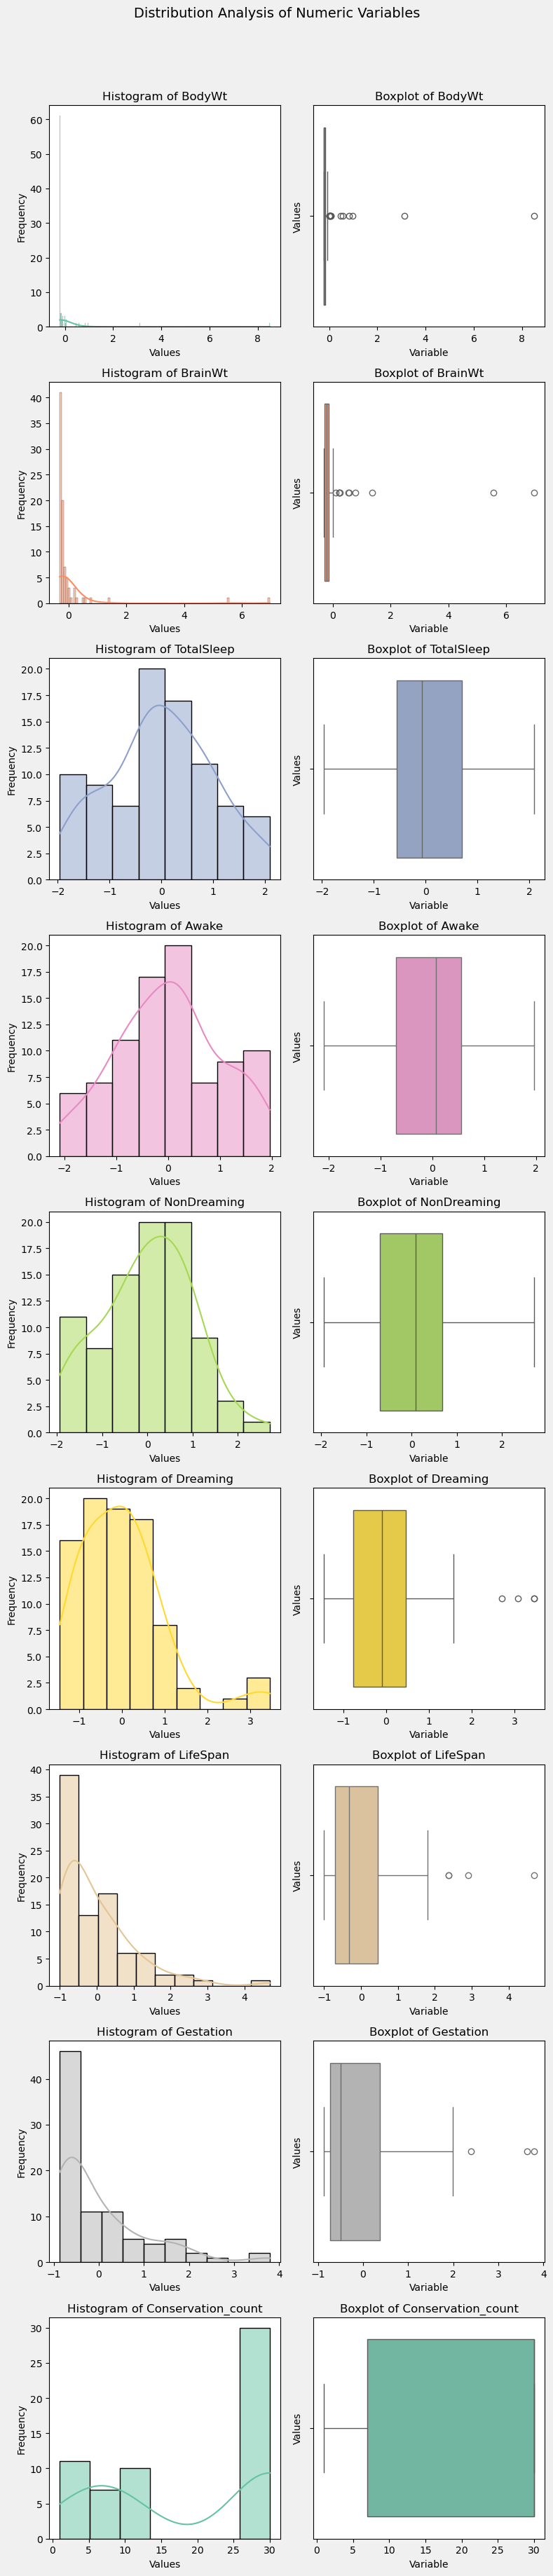

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to plot
numeric_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"] and col not in ['Predation', 'Exposure', 'Danger']]

# Define a color palette for the plots
color_palette = sns.color_palette("Set2", len(numeric_cols))

# Create a figure for the subplots with a smaller size and non-white background
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(8, 4 * len(numeric_cols)))  # Adjust figsize
fig.set_facecolor('#f0f0f0')  # Set background color to light gray

for i, col in enumerate(numeric_cols):
    # Plot the histogram on the left (first column)
    sns.histplot(data=df, x=col, bins="auto", kde=True, ax=axes[i, 0], color=color_palette[i])
    axes[i, 0].set_title(f"Histogram of {col}")
    axes[i, 0].set_xlabel("Values")
    axes[i, 0].set_ylabel("Frequency")
    
    # Plot the boxplot on the right (second column)
    sns.boxplot(data=df, x=col, ax=axes[i, 1], color=color_palette[i])
    axes[i, 1].set_title(f"Boxplot of {col}")
    axes[i, 1].set_xlabel("Variable")
    axes[i, 1].set_ylabel("Values")

# Add a title to the entire figure
plt.suptitle("Distribution Analysis of Numeric Variables", fontsize=14, y=1.02)  # Adjust fontsize

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Seems like it's well standardize.

## Saving File - Data cleaned

In [157]:
df = df.sort_values(by="Species", ascending=True)
df.to_csv("data\cleaned_sleep_merged.csv", index=False)

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\moham\AppData\Local\Temp\ipykernel_18092\1826127080.py:2: SyntaxWarning: invalid escape sequence '\c'
  df.to_csv("data\cleaned_sleep_merged.csv", index=False)


In [158]:
import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from scipy.stats import anderson, kstest, shapiro

# MODELLING

In [159]:
file = "data\cleaned_sleep_merged.csv"

data = pd.read_csv(file)

df = copy.deepcopy(data)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\moham\AppData\Local\Temp\ipykernel_18092\2191905587.py:1: SyntaxWarning: invalid escape sequence '\c'
  file = "data\cleaned_sleep_merged.csv"


In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Load the dataset
df = pd.read_csv("data/cleaned_sleep_merged.csv")

# Feature Selection based on f_regression
features = ['Gestation', 'Exposure', 'LifeSpan', 'Danger', 'BrainWt', 'BodyWt', 'Vore_herbi', 'Vore_insecti','Vore_omni', 'Predation']
X = df[features]
y_total_sleep = df['TotalSleep']
y_dreaming = df['Dreaming']

# Initialize dictionaries to store the cumulative MSE and R2 scores for averaging
cumulative_results_dreaming = {"Linear Regression": {"MSE": [], "R2": []},
                               "Random Forest": {"MSE": [], "R2": []},
                               "Gradient Boosting": {"MSE": [], "R2": []},
                               "SVR" : {"MSE" : [], "R2": []}}

cumulative_results_total_sleep = {"Linear Regression": {"MSE": [], "R2": []},
                                  "Random Forest": {"MSE": [], "R2": []},
                                  "Gradient Boosting": {"MSE": [], "R2": []},
                                  "SVR" : {"MSE" : [], "R2": []}}

def model_apply(X_train, X_test, y_train, y_test, cumulative_results):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        cumulative_results[name]["MSE"].append(mse)
        cumulative_results[name]["R2"].append(r2)
    return cumulative_results

# Iterate over a range of random_state values
# for random_state in range(0, 2):
random_state = 11
# Define and train models correctly with random_state as a keyword argument
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=random_state),
    "Gradient Boosting": GradientBoostingRegressor(random_state=random_state),
    "SVR": SVR()
}

# Splitting the dataset for both targets
X_train_total_sleep, X_test_total_sleep, y_train_total_sleep, y_test_total_sleep = train_test_split(X, y_total_sleep, test_size=0.2, random_state=random_state)
X_train_dreaming, X_test_dreaming, y_train_dreaming, y_test_dreaming = train_test_split(X, y_dreaming, test_size=0.2, random_state=random_state)

cumulative_results_dreaming = model_apply(X_train_dreaming, X_test_dreaming, y_train_dreaming, y_test_dreaming, cumulative_results_dreaming)
cumulative_results_total_sleep = model_apply(X_train_total_sleep, X_test_total_sleep, y_train_total_sleep, y_test_total_sleep, cumulative_results_total_sleep)

# Calculate and print the mean MSE and R2 for each model
def print_mean_results(cumulative_results, title):
    print(f"Mean Results for {title}:")
    for model, metrics in cumulative_results.items():
        mean_mse = np.mean(metrics["MSE"])
        mean_r2 = np.mean(metrics["R2"])
        print(f"{model} - MSE: {mean_mse:.4f}, R2: {mean_r2:.4f}")

print_mean_results(cumulative_results_dreaming, "Dreaming")
print("\n")
print_mean_results(cumulative_results_total_sleep, "Total Sleep")


Mean Results for Dreaming:
Linear Regression - MSE: 0.7811, R2: 0.2971
Random Forest - MSE: 0.3661, R2: 0.6705
Gradient Boosting - MSE: 0.4090, R2: 0.6319
SVR - MSE: 0.6224, R2: 0.4399


Mean Results for Total Sleep:
Linear Regression - MSE: 0.7424, R2: 0.4854
Random Forest - MSE: 0.5730, R2: 0.6028
Gradient Boosting - MSE: 0.5675, R2: 0.6066
SVR - MSE: 0.8792, R2: 0.3905


In [25]:
target = df["TotalSleep"]
features = df[['Gestation', 'Exposure', 'LifeSpan', 'Danger', 'BrainWt', 'BodyWt', 'Vore_herbi', 'Vore_insecti', 'Predation']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state= 11 )

y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(mse,r2)


0.7194780179566705 0.5012372671102341


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets (no validation set due to limited data)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=11)

# Initialize a Ridge regression model with a conservative alpha (regularization strength)
model = Ridge(alpha=4)  # Adjust the alpha value as needed

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Calculate metrics on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Test MSE:", mse_test)
print("Test R2 Score:", r2_test)


Test MSE: 0.006547673049859586
Test R2 Score: 0.9954609658350767


In [163]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state= 11 )

y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(mse,r2)



c:\Users\moham\anaconda3\envs\ML_project\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.014691507006428696 0.9898154272932397


In [164]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state= 11 )

y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(mse,r2)



0.007033705799037082 0.9951240340370182


c:\Users\moham\anaconda3\envs\ML_project\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [165]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state= 10 )

y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

model = SVR()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(mse,r2)



0.03266472389378412 0.9676480912917546


c:\Users\moham\anaconda3\envs\ML_project\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### TRYING WITH METHOD FUNC

In [178]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\moham\anaconda3\envs\ML_project\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [167]:
import numpy as np
import pandas as pd
import copy

def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if not x_labels:
        X = dataframe[[c for c in dataframe.columns if (c != y_label) and (dataframe[c].dtype == float or dataframe[c].dtype == int)]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    Y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, Y))

    return data, X, Y


In [179]:
_, X_train_temp, Y_train_temp = get_xy(train, 'TotalSleep')
_, X_val_temp, Y_val_temp = get_xy(val, 'TotalSleep')
_, X_test_temp, Y_test_temp = get_xy(test, 'TotalSleep')

In [177]:
df = df.drop("Conservation_count",axis=1)

In [180]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, Y_train_temp)

LinearRegression()

In [181]:
print(temp_reg.coef_,temp_reg.intercept_)

[[ 1.70489488e-03 -3.20569771e-03 -1.00067824e+00 -1.73942861e-04
  -2.73208528e-04 -1.30760544e-03  2.42796462e-03  3.28321840e-04
  -4.47353238e-06 -8.91285165e-04]] [0.00128061]


In [182]:
temp_reg.score(X_test_temp, Y_test_temp)

0.999992792758761

## Test area (to test some code before implementing them in the notebook above)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler_brain = StandardScaler()
scaler_body = StandardScaler()
# Fit and transform the 'BrainWt' feature
df['BrainWt'] = scaler_brain.fit_transform(df['BrainWt'].values.reshape(-1, 1))

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
# scaler_body = MinMaxScaler()

# Fit and transform the 'BodyWt' feature
df['BodyWt'] = scaler_body.fit_transform(df['BodyWt'].values.reshape(-1, 1))


(array([14., 19., 15., 19., 10.,  5.,  1.,  0.,  1.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

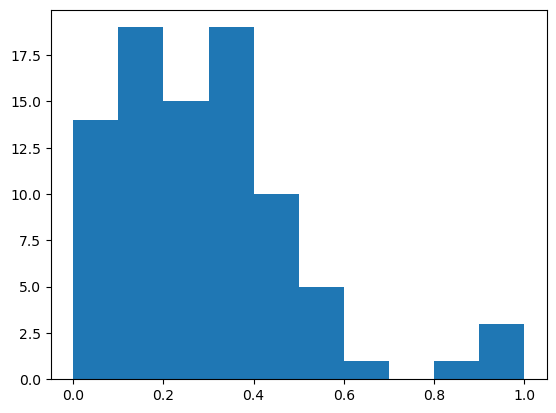

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalizer = MinMaxScaler()
df["Dreaming"] = scaler.fit_transform(df["Dreaming"].values.reshape(-1,1))
df["Dreaming"] = normalizer.fit_transform(df["Dreaming"].values.reshape(-1,1))

plt.hist(df["Dreaming"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Reshape the data for scaling
df['Dreaming'] = scaler.fit_transform(df['Dreaming'].values.reshape(-1, 1))

# Check the maximum value after normalization
max_normalized_value = df['Dreaming'].max()
print(max_normalized_value)  # This should be close to 1


1.0


In [ ]:

''' ------------------------------------------ '''

df_model_complete = df[-df["BrainWt"].isnull()]

feature = df_model_complete["BodyWt"].values.reshape(-1,1)
target = df_model_complete["BrainWt"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 10)

model = LinearRegression()
# model = GradientBoostingRegressor(random_state=10)
# model = RandomForestRegressor(random_state=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred = np.maximum(y_pred,0)
y_pred = np.round(y_pred,2)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

0.04327098776118519 0.47459538960610714


In [ ]:
df = copy.deepcopy(data)

In [ ]:
df["BrainWt"] = df["BrainWt"].replace(0, np.nan)

In [ ]:
models = {"Gradient Boosting": GradientBoostingRegressor(random_state=11),
          "KNN Regressor": KNeighborsRegressor(),
          "Random Forest": RandomForestRegressor(random_state=11),
          "Linear Regression": LinearRegression(),
          "Support Vector Machine": SVR()}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

df_model = df[-df["Dreaming"].isnull()]
df_model_feat = df_model[["TotalSleep","Gestation","Danger"]]
df_model_targ = df_model[["Dreaming"]]

# n=int(input("Please enter an integer"))
n = 3

X_trains, X_tests, y_trains, y_tests = train_test_split(df_model_feat, df_model_targ, test_size=0.2, random_state=n)

X_trains = X_trains.values.reshape(-1,1)
y_trains = y_trains.values.reshape
X_tests = X_tests.values.reshape(-1,1)
y_tests = y_tests.values.reshape

models = {"Gradient Boosting": GradientBoostingRegressor(random_state=n),
          "KNN Regressor": KNeighborsRegressor(),
          "Random Forest": RandomForestRegressor(random_state=n),
          "Linear Regression": LinearRegression(),
          "Support Vector Machine": SVR()}

In [ ]:
def train_model(X_train, X_test, y_train, y_test):
    model_results = {}
    r2_list = {}
    residuals = []
    for name, model in models.items():  # Changed 'models' to 'model' inside the loop
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        #Storing residuals
        residual = y_test - y_pred
        #Storing results
        model_results[name] = {"MSE": mse, "R2": r2}
        best_model_name = max(model_results, key=lambda k: model_results[k]["R2"])

        #Ploting residual histograms
        plt.hist(residual, bins='auto')
        plt.title(model)
        plt.xlabel(f"Histogram for {model}")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()
    
    #end of loop, printing final results
    print(f"The best model for this run was: {best_model_name}","\n\n\n")


    #create a residual dataframe
    print(residuals)
    
    return model_results